# Intro
EDA: Explorartory Data Analysis(탐색적 데이터 분석)

데이터에 대한 분석을 통해서, 해당 데이터에 대한 전반적인 이해를 도모한다.
어떤 feature들이 우리가 해결하고자 하는 문제에 도움이 될지 판단한다.

In [1]:
# 라이브러리 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
df = pd.read_csv("diabetes.csv")

(768, 9)

In [3]:
# info로 데이터타입, 결측치, 메모리 사용량의 정보를 알 수 있다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#결측치를 확인해봅시다.
df_null = df.isnull()
df_null.sum() # 각각의 feature별로 결측치의 개수를 확인할 수 있다. 


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
#수치 데이터에 대한 요약
df.describe() #include = "object"와 같이 명목형인 데이터 타입에 대해서도 수행 가능하다.

'''

해당 수치에서 0이라고 나오는 부분이 결측치이지는 않을까? 생각해 볼 수 있어야 한다.

'''

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 결측치 시각화

In [12]:
feature_columns = df.columns[:-1].tolist()
# 맨 앞에 있는 pregnaices(출산?)을 제외한 다른 column들을 가져온다.
cols = feature_columns[1:]

df[cols].head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33


In [14]:
# 0을 결측치라고 가정하고 나서, 0 --> nan 값으로 바꾼다.
import numpy as np
df_null = df[cols].replace(0,np.nan)
df_null.isnull().sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

93.14285714285714

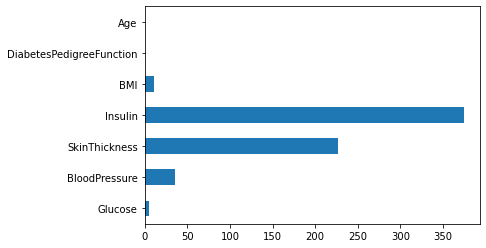

In [18]:
# 결측치의 개수를 시각화 합니다.
df_null.isnull().sum().plot.barh()


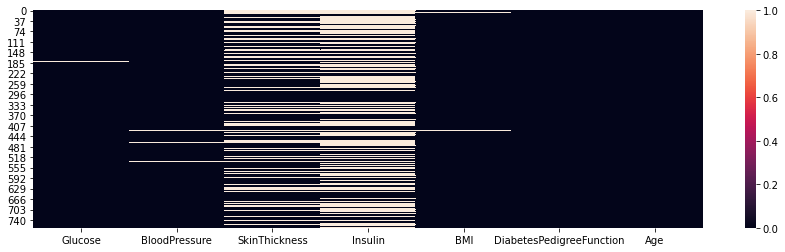

In [23]:
plt.figure(figsize = (15,4))
sns.heatmap(df_null.isnull())

In [25]:
# 정답값
df["Outcome"].value_counts(normalize = True) # normalize 기능 사용 가능.

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [31]:
df_po = df.groupby(["Pregnancies"])["Outcome"].agg(["mean", "count"]).reset_index()
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


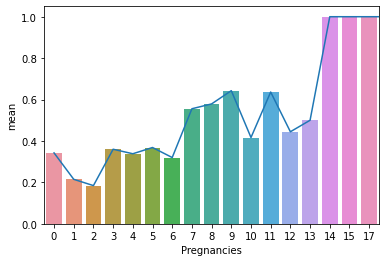

In [36]:
#임신횟수에 따른 당뇨병 발병비율
#df_po["mean"].plot() --> 이건 잘못된 듯?
sns.lineplot(x = df_po["Pregnancies"], y = df_po["mean"])
sns.barplot(x = df_po["Pregnancies"], y = df_po["mean"])

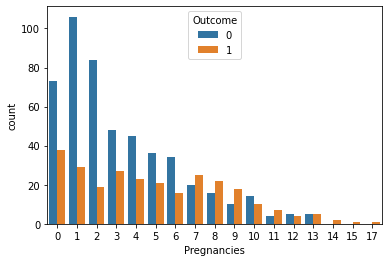

In [85]:
# countplot --> 빈도수를 나타낼 때 시각화가 가능하다. 
#sns.countplot(data = df, x = "Outcome")
#임신횟수에 따른 당뇨병 발병 빈도
sns.countplot(data = df, x = "Pregnancies", hue = "Outcome")


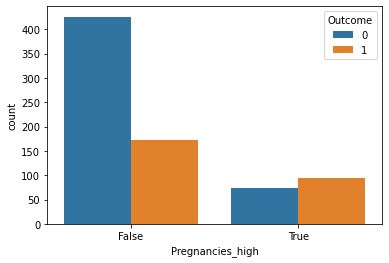

In [49]:
df["Pregnancies_high"] =  df["Pregnancies"] > 6
df[["Pregnancies","Pregnancies_high"]] #범주형 데이터로 만들었다.
sns.countplot(data = df, x = "Pregnancies_high", hue = "Outcome")

# 두 개의 변수를 정답값에 따라 시각화하기
- barplot

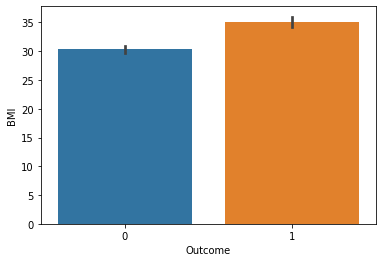

In [51]:
#당뇨병 발병에 따른 BMI
sns.barplot(data = df, x = "Outcome", y = "BMI")

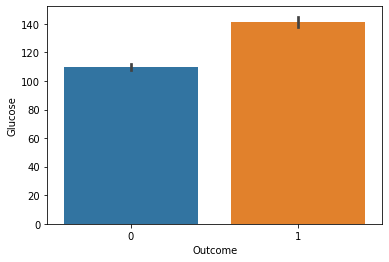

In [53]:
#당뇨병 발병에 따른 포도당수치
sns.barplot(data = df, x = "Outcome", y = "Glucose")

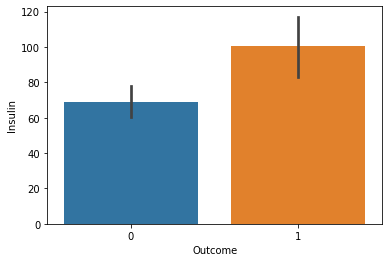

In [54]:
# 당뇨병 발병에 따른 인슐린수치
# 검정색 선은 신뢰구간을 의미합니다.
sns.barplot(data = df, x = "Outcome", y = "Insulin")

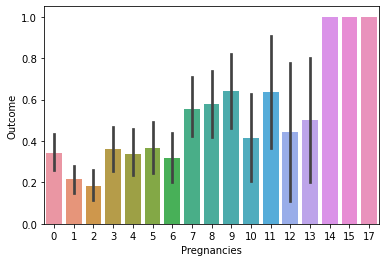

In [55]:
#임신횟수에 따른 당뇨병발병 비율 구하기
sns.barplot(data = df, x = "Pregnancies", y = "Outcome")

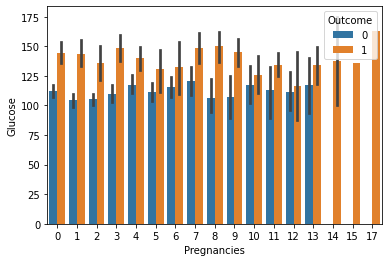

In [57]:
#임신횟수에 따른 글루코스 비율 구하기
sns.barplot(data = df, x = "Pregnancies", y = "Glucose", hue = "Outcome")

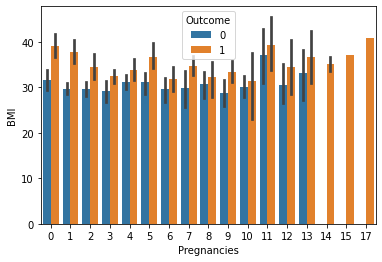

In [58]:
#임신횟수에 따른 BMI 비율 구하기
sns.barplot(data = df, x = "Pregnancies", y = "BMI", hue = "Outcome")

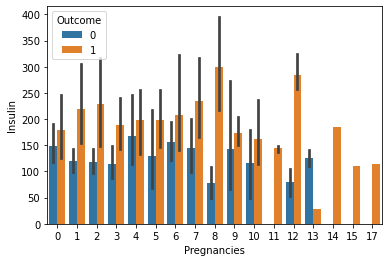

In [64]:
#임신횟수에 따른 인슐린 비율 구하기
sns.barplot(data = df[df["Insulin"] > 0], x = "Pregnancies", y = "Insulin", hue = "Outcome")


# Boxplot

five numbers summary라고 생각하면 되겠다.

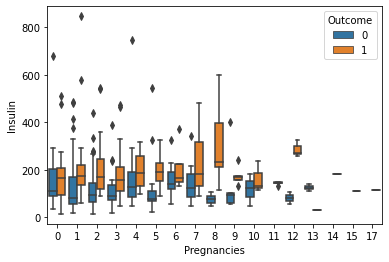

In [63]:
# 임신횟수에 따른 인슐린 수치에 대해서 이해해봅시다.
# 이때 인슐린 수치가 0이상인 데이터 셋을
sns.boxplot(data = df[df["Insulin"] > 0] ,x = "Pregnancies", y = "Insulin", hue = "Outcome")

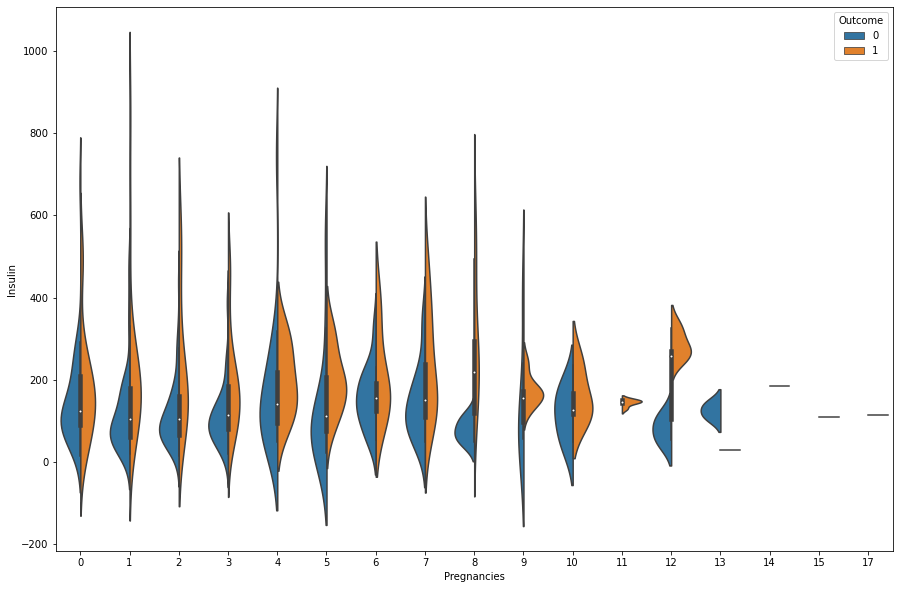

In [67]:
# violin plot
plt.figure(figsize = (15,10))
sns.violinplot(data = df[df["Insulin"] > 0] ,x = "Pregnancies", y = "Insulin", hue = "Outcome", split = True)

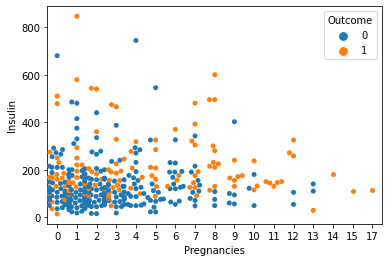

In [68]:
#swarmplot
#데이터의 sample수 이해가능
sns.swarmplot(data = df[df["Insulin"] > 0] ,x = "Pregnancies", y = "Insulin", hue = "Outcome")


In [72]:
#당뇨병이 발병할때와 안할떄를 분류한다.
df_0 = df[df["Outcome"] == 0]
df_1 = df[df["Outcome"] == 1]

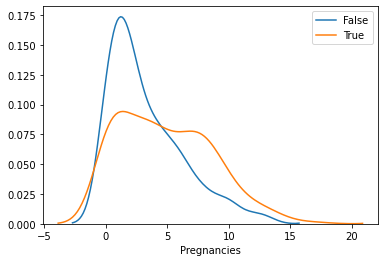

In [83]:
#distplot
#분포를 이해할 수 있는 것 같다!
#임신횟수에 따른 당뇨병 발병 여부를 시각화 합니다.
sns.distplot(df_0["Pregnancies"], hist = False, label = "False")
sns.distplot(df_1["Pregnancies"], hist = False, label = "True")

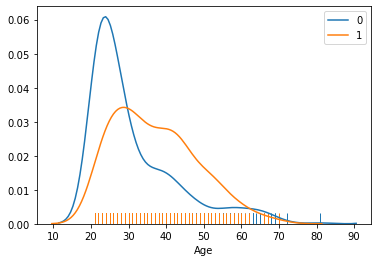

In [79]:
#나이에 따른 분포
#sns.distplot(df["Age"])
sns.distplot(df_0["Age"], hist = False, rug = True, label = "0")
sns.distplot(df_1["Age"], hist = False, rug = True, label = "1")


### 정리
1) df.info() 혹은 df.describe()를 통해서 데이터 전반적인 이해를 도모할 수 있다.

2) 0이라고 나와있는 걸 보고서 이를 결측치라고 이해할 수 있다. (이런 insight 요구)

3) 결측치 처리 <br>
df.isnull().sum()을 통해서 결측치의 개수를 확인하고, 이를 시각화 할 수 있다.

4)<b> countplot </b><br>
빈도에 대해서 처리하기 위해서 사용한다. <br>
이때 hue기능을 통해서, 원하는 범주를 설정할 수 있다. <br>
ex) sns.countplot(data = df, x = "Pregnancies", hue = "Outcome") --> 출산율에 따른, 당뇨병발병여부
--> 매우 유용할듯

5) <b>원핫인코딩 기법 </b> <br>
원래 0과1로 표현하는 기법으로 이해한다 (논리설계에서 배웠던 것 같기도)

여기서는 Pregnancies가 6보다 큰 경우를 True로 잡아서 --> 새로운 명목형 변수로 만들어 주었다.

In [ ]:
'1' --> 0001
'2' --> 0010
'3' --> 0100
'4' --> 1000
